In [1]:
import scanpy as sc
import numpy as np
import pandas as pd

In [2]:
from liana.method.sp._Misty import MistyData
from liana.method.sp._misty_constructs import genericMistyData, lrMistyData

In [3]:
from liana.pl._misty_plots import plot_target_metrics, plot_interactions, plot_contributions

In [4]:
import plotnine as p9

In [5]:
adata = sc.read_h5ad('liana/tests/data/synthetic.h5ad')

In [6]:
misty = genericMistyData(intra=adata, bandwidth=10, cutoff=0, add_juxta=False, set_diag=False)

/home/dbdimitrov/anaconda3/envs/spiana/lib/python3.10/site-packages/mudata/_core/mudata.py:458: UserWarning: Cannot join columns with the same name because var_names are intersecting.


In [7]:
misty(seed = 42, verbose = True, n_estimators = 100)

Now learning: prodD: 100%|██████████| 11/11 [00:38<00:00,  3.48s/it]


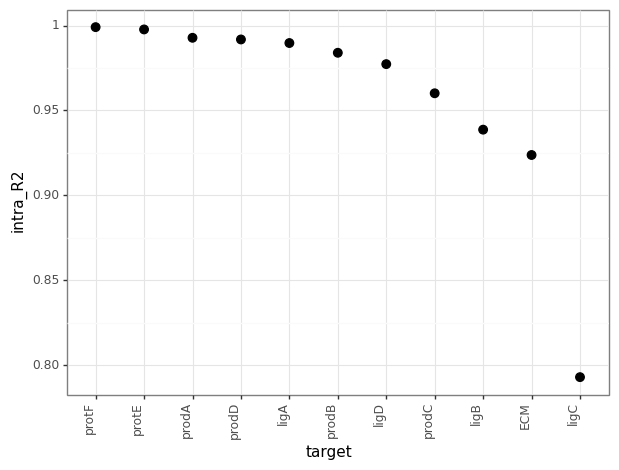

<ggplot: (8757456725848)>

In [8]:
plot_target_metrics(misty, stat='intra_R2', return_fig=True)

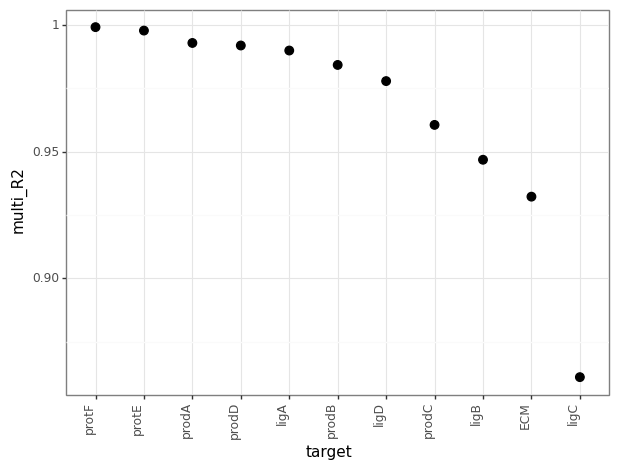

<ggplot: (8757456081389)>

In [9]:
plot_target_metrics(misty, stat='multi_R2')

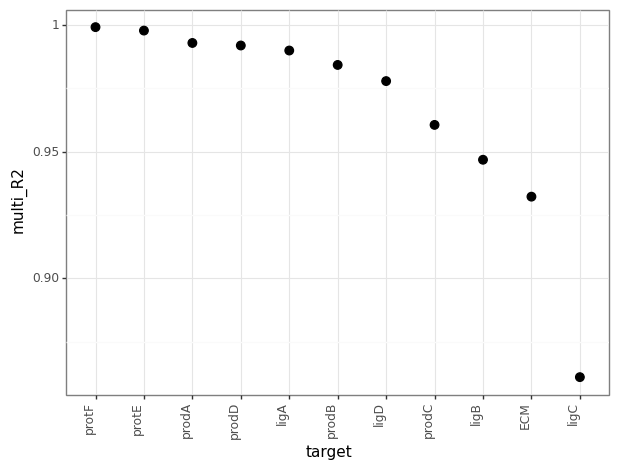

<ggplot: (8757456061711)>

In [10]:
plot_target_metrics(misty, stat="multi_R2")

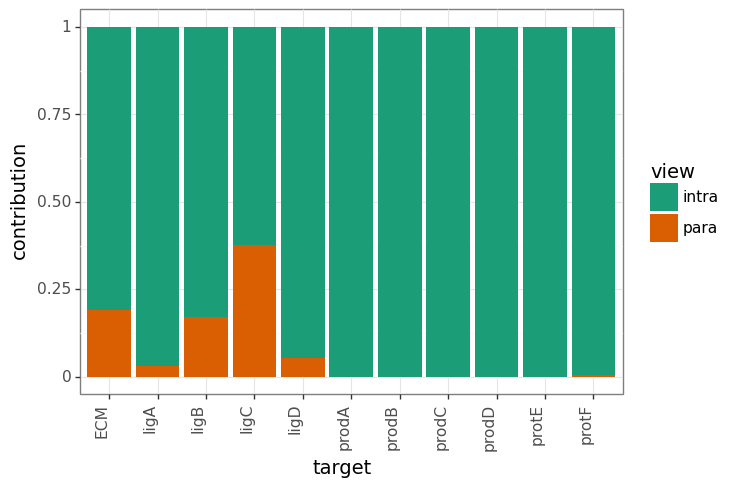

<ggplot: (8757456006475)>

In [11]:
plot_contributions(misty, return_fig=True)

In [12]:
misty.uns['interactions'].sort_values(by='importances', ascending=False).head(10)

,target,predictor,intra_group,extra_group,view,importances
107,prodD,prodA,None,None,intra,0.969999
79,prodA,prodD,None,None,intra,0.969919
41,ligD,ligA,None,None,intra,0.920821
13,ligA,ligD,None,None,intra,0.867348
82,prodB,ligB,None,None,intra,0.818249
93,prodC,ligC,None,None,intra,0.745414
38,ligC,prodC,None,None,intra,0.711640
27,ligB,prodB,None,None,intra,0.690028
66,protF,prodA,None,None,intra,0.602672
50,protE,ECM,None,None,intra,0.410209


Linear Misty

In [19]:
misty(seed = 42, verbose = True, model='linear', k_cv=10)

Now learning: prodD: 100%|██████████| 11/11 [00:37<00:00,  3.45s/it]


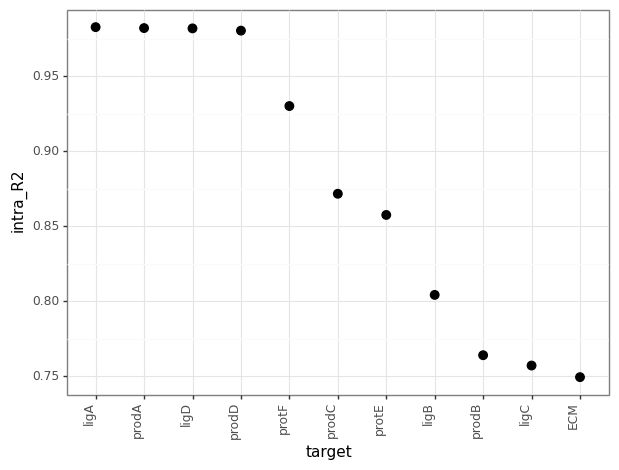

<ggplot: (8757455643943)>

In [20]:
plot_target_metrics(misty, stat='intra_R2', return_fig=True)

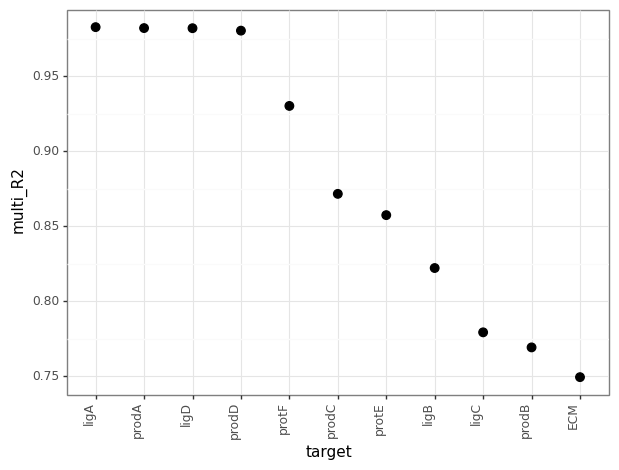

<ggplot: (8757455803498)>

In [21]:
plot_target_metrics(misty, stat='multi_R2')

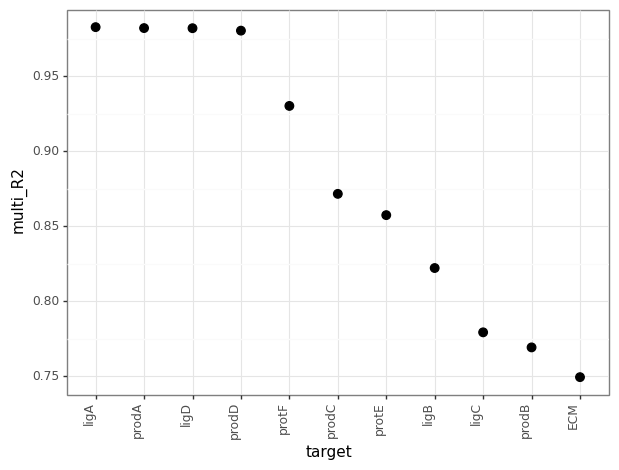

<ggplot: (8757455673290)>

In [22]:
plot_target_metrics(misty, stat="multi_R2")

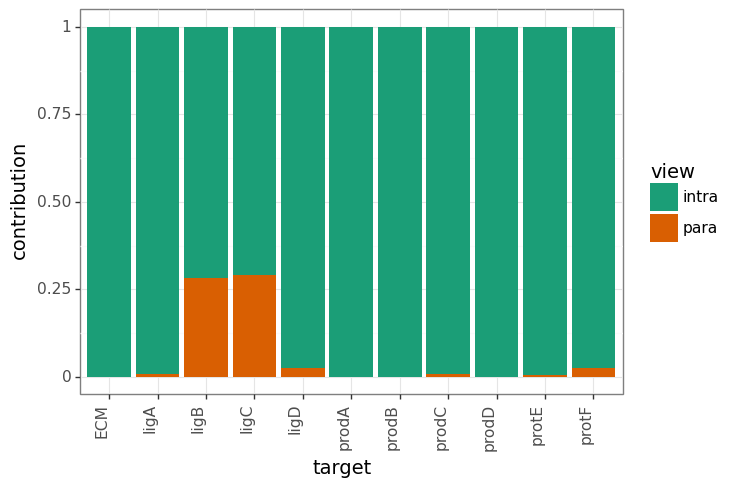

<ggplot: (8757455578833)>

In [23]:
plot_contributions(misty, return_fig=True)

In [18]:
misty.uns['interactions'].sort_values(by='importances', ascending=False).head(10)

,target,predictor,intra_group,extra_group,view,importances
62,protF,ligB,None,None,intra,2.263213
1,ECM,ligB,None,None,intra,2.198615
66,protF,prodA,None,None,intra,2.026960
167,protE,prodB,None,None,para,1.730211
56,protE,prodA,None,None,intra,1.594816
50,protE,ECM,None,None,intra,1.298842
41,ligD,ligA,None,None,intra,1.221211
107,prodD,prodA,None,None,intra,1.183868
82,prodB,ligB,None,None,intra,1.166401
53,protE,ligC,None,None,intra,1.080178


LR Misty

In [ ]:
from liana.testing._sample_anndata import generate_toy_spatial

In [ ]:
adata = generate_toy_spatial()
misty = lrMistyData(adata, bandwidth=10, set_diag=True, cutoff=0)

In [ ]:
misty(bypass_intra=True, model='linear')

In [ ]:
plot_interactions(misty, 'extra', return_fig=True)

In [ ]:
import liana as li

In [ ]:
resource

In [ ]:
resource = li.resource.select_resource('consensus')

In [ ]:
resource = resource[(resource['receptor'].isin(['TNFRSF17'])) & resource['ligand'].isin(misty.uns['interactions']['predictor'].unique())]

In [ ]:
resource